This code block handles the import statements and data loading, to keep the notebook clean.

In [2]:
import pandas as pd
import kagglehub
from sklearn.linear_model import LinearRegression

#Philadelphia 2025 Crime Statistics, from our github
url = "data/philadelphia_crime_data_2025.csv"
phil_test = pd.read_csv(url)

#this downloads the kaggle nfl dataset
path_nfl = kagglehub.dataset_download("keonim/nfl-game-scores-dataset-2017-2023")
game_dates = pd.read_csv(f"{path_nfl}/Season_Scores/2024_scores.csv")


In [3]:
phil_test

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E610000078D60B9155CC52C00609171317FB...,1,0101000020110F0000365F9FE53BEE5FC11CBBED6D748A...,27244917,16,1,2025-02-27 01:16:00+00,2025-02-26,20:16:00,20,2.025160e+11,400 BLOCK N 35TH ST,300,Robbery No Firearm,-75.192723,39.961642,39.961642,-75.192723
1,0101000020E6100000205EFA3EECC952C0C8AFBCA424FD...,2,0101000020110F000075DADA5023EA5FC1F87526DCBA8C...,27742666,22,3,2025-03-23 21:15:00+00,2025-03-23,17:15:00,17,2.025220e+11,1200 BLOCK CECIL B MOORE AV,400,Aggravated Assault No Firearm,-75.155044,39.977681,39.977681,-75.155044
2,0101000020E6100000C8BB2A1DDACA52C06845954DB8F9...,3,0101000020110F00004F32C35BB7EB5FC19CDDA2C8EF88...,27742672,9,3,2025-03-23 20:19:00+00,2025-03-23,16:19:00,16,2.025090e+11,100 BLOCK S 17TH ST,400,Aggravated Assault No Firearm,-75.169563,39.950937,39.950937,-75.169563
3,0101000020E610000080102393B2C152C020440F42E10C...,4,0101000020110F000005140F9F2ADC5FC183209DE12F9E...,27742741,7,2,2025-03-23 22:12:00+00,2025-03-23,18:12:00,18,2.025070e+11,900 BLOCK RED LION RD,400,Aggravated Assault No Firearm,-75.026524,40.100624,40.100624,-75.026524
4,0101000020E6100000B818A83186CB52C00C1F32618BFD...,5,0101000020110F0000D26359A7DBEC5FC168F628BA2C8D...,27245131,22,4,2025-02-27 13:27:00+00,2025-02-27,08:27:00,8,2.025220e+11,1600 BLOCK N 28TH ST,400,Aggravated Assault Firearm,-75.180066,39.980816,39.980816,-75.180066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55997,0101000020E61000006B892A3685C952C02ABCF4C42DFF...,3392169,0101000020110F0000BF8B2F4D74E95FC104097180FC8E...,24722516,25,4,2025-01-09 18:38:00+00,2025-01-09,13:38:00,13,2.025250e+11,1000 BLOCK W LEHIGH AV,600,Thefts,-75.148756,39.993584,39.993584,-75.148756
55998,0101000020E61000004CC3F01131C052C07520EBA9D505...,3392177,0101000020110F0000E61787CD9BD95FC103E9531F5E96...,25223158,8,1,2025-01-28 18:11:00+00,2025-01-28,13:11:00,13,2.025080e+11,4700 BLOCK Tolbut St,600,Theft from Vehicle,-75.002995,40.045583,40.045583,-75.002995
55999,0101000020E6100000442E7A9F91C952C0125464DFDBF4...,3392182,0101000020110F0000801A2B6289E95FC191AD4A7A8D83...,24169443,3,2,2025-01-01 21:27:00+00,2025-01-01,16:27:00,16,2.025030e+11,2700 BLOCK S FRONT ST,600,Thefts,-75.149513,39.912960,39.912960,-75.149513
56000,0101000020E610000091A3EF2498CF52C0D481ACA7D6F5...,3392189,0101000020110F00002460DB82C5F35FC128F27A2DA384...,24628289,12,2,2025-01-19 07:07:00+00,2025-01-19,02:07:00,2,2.025120e+11,7000 BLOCK GREENWAY AV,400,Aggravated Assault No Firearm,-75.243661,39.920613,39.920613,-75.243661


In [4]:
def nfl_game_date(year, team):
    # load the specific year
    df = pd.read_csv(f"{path_nfl}/Season_Scores/{year}_scores.csv")
    df = df.dropna(subset=['Date'])

    # subsets the df to games where the team is playing
    df_away = df[(df["AwayTeam"] == team)]
    df_home = df[(df["HomeTeam"] == team)]

    home_dates_with_year = df_home['Date'].apply(
        lambda x: f"{x}/{year+1}" if int(str(x).split('/')[0]) <= 6 
        else f"{x}/{year}")    
    away_dates_with_year = df_away['Date'].apply(
        lambda x: f"{x}/{year+1}" if int(str(x).split('/')[0]) <= 6 
        else f"{x}/{year}")

    # Now convert to datetime
    home_game_dates = pd.to_datetime(home_dates_with_year)
    away_game_dates = pd.to_datetime(away_dates_with_year)

    # Gets the result of the game
    home_game_win = df_home['HomeWin'].to_list()
    away_game_win = df_away['AwayWin'].to_list()

    # Convert to "Win" or "Loss"
    home_game_win = ["Win" if bool(x) else "Loss" for x in home_game_win]
    away_game_win = ["Win" if bool(x) else "Loss" for x in away_game_win]

    # Creates an away, home df, with the pairs for results and tags the Location
    home = pd.DataFrame(list(zip(home_game_dates, home_game_win)))
    away = pd.DataFrame(list(zip(away_game_dates, away_game_win)))
    home["Location"] = "Home"
    away["Location"] = "Away"

    # Puts the two together and sorts them by date
    season = pd.concat([home, away], ignore_index=True) 
    season.columns = ["Date", "Result", "Location"]
    season = season.sort_values('Date').reset_index(drop=True)    

    return season


In [5]:
nfl_game_date(2024, "Eagles")

,Date,Result,Location
0,2024-08-09,Win,Away
1,2024-08-15,Win,Away
2,2024-08-24,Loss,Home
3,2024-09-06,Win,Home
4,2024-09-16,Loss,Home
5,2024-09-22,Win,Away
6,2024-09-29,Loss,Away
7,2024-10-13,Win,Home
8,2024-10-20,Win,Away
9,2024-10-27,Win,Away


In [6]:
#this downloads the kaggle nba dataset
path_nba = kagglehub.dataset_download("eoinamoore/historical-nba-data-and-player-box-scores")

In [7]:
def nba_game_date(team,year):
    #first get teamId for this dataset
    team_df = pd.read_csv(f"{path_nba}/TeamHistories.csv")

    #searches the dataset for the ID, returns nothing if not found
    team_id = team_df[team_df['teamName'] == team]['teamId']
    if not team_id.empty:
        team_id = team_id.iloc[0]
    else:
        print("Team not found in dataset, look at the documentation.")
        return

    #use team_id and year to sort games wanted
    df = pd.read_csv(f"{path_nba}/Games.csv", low_memory=False)
    df["gameDate"] = pd.to_datetime(df["gameDate"])
    start = pd.to_datetime(f"{year}-10-01")
    end = pd.to_datetime(f"{year+1}-06-30")
    df_home = df[(df["hometeamId"] == team_id) & ((df['gameDate'] >= start) & (df['gameDate'] <= end))]
    df_away = df[(df["awayteamId"] == team_id) & ((df['gameDate'] >= start) & (df['gameDate'] <= end))]


    home_game_dates = df_home["gameDate"].to_list()
    away_game_dates = df_away["gameDate"].to_list()
    
    home_game_win = [x == team_id for x in df_home['winner']]
    away_game_win = [x == team_id for x in df_away['winner']]

    #Creates an away, home df, with the pairs for results and tags the Location
    home = pd.DataFrame(list(zip(home_game_dates, home_game_win)))
    away = pd.DataFrame(list(zip(away_game_dates, away_game_win)))
    home["Location"] = "Home"
    away["Location"] = "Away"
    season = pd.concat([home, away], ignore_index=True) 
    season.columns = ["Date", "Result", "Location"]
    season = season.sort_values('Date').reset_index(drop=True)    
    
    return season

In [8]:
nba_game_date("76ers",2024)

,Date,Result,Location
0,2024-10-11 19:00:00,False,Away
1,2024-10-12 20:00:00,False,Away
2,2024-10-14 19:30:00,True,Away
3,2024-10-16 19:00:00,True,Home
4,2024-10-18 19:00:00,False,Away
...,...,...,...
82,2025-04-05 19:00:00,False,Home
83,2025-04-07 19:30:00,False,Away
84,2025-04-09 19:00:00,True,Away
85,2025-04-11 19:00:00,False,Home


In [9]:
#average number of crimes per day of the week
def average_crimes_per_day_of_week(df, datetime_column):
    df[datetime_column] = pd.to_datetime(df[datetime_column])
    df['date'] = df[datetime_column].dt.date
    df['day_of_week'] = df[datetime_column].dt.day_name()

    daily_counts = df.groupby(['date', 'day_of_week']).size().reset_index(name='daily_crime_count')
    avg_by_day = daily_counts.groupby('day_of_week')['daily_crime_count'].mean().reset_index()
    avg_by_day = avg_by_day.rename(columns={'daily_crime_count': 'avg_crimes_per_day'})
    return avg_by_day

#average number of crimes by type of crime per day
def average_specific_crimes_per_day(df, datetime_column, crime_type_column='text_general_code'):
    df[datetime_column] = pd.to_datetime(df[datetime_column])
    df['date'] = df[datetime_column].dt.date

    daily_counts = df.groupby(['date', crime_type_column]).size().reset_index(name='daily_crime_count')
    avg_by_type = daily_counts.groupby(crime_type_column)['daily_crime_count'].mean().reset_index()
    avg_by_type = avg_by_type.rename(columns={'daily_crime_count': 'avg_crimes_per_day'})
    return avg_by_type

# Philadelphia 2024 baseline
crime_df_philly_2024 = pd.read_csv("data/philadelphia_crime_data_2024.csv")
philly_avg_by_day = average_crimes_per_day_of_week(crime_df_philly_2024, datetime_column='dispatch_date_time')
philly_avg_by_type = average_specific_crimes_per_day(crime_df_philly_2024, datetime_column='dispatch_date_time')

# Chicago 2024–2025
crime_df_chicago = pd.read_csv("data/chicago_crime_data.csv")
chicago_avg_by_day = average_crimes_per_day_of_week(crime_df_chicago, datetime_column='Date')
chicago_avg_by_type = average_specific_crimes_per_day(crime_df_chicago, datetime_column='Date', crime_type_column='Primary Type')

/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/3265958478.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[datetime_column] = pd.to_datetime(df[datetime_column])


In [10]:
philly_avg_by_day

,day_of_week,avg_crimes_per_day
0,Friday,442.788462
1,Monday,464.113208
2,Saturday,393.769231
3,Sunday,376.519231
4,Thursday,452.192308
5,Tuesday,471.377358
6,Wednesday,465.634615


In [11]:
philly_avg_by_type

,text_general_code,avg_crimes_per_day
0,Aggravated Assault Firearm,7.698630
1,Aggravated Assault No Firearm,15.281421
2,All Other Offenses,39.051913
3,Arson,2.347403
4,Burglary Non-Residential,4.441011
5,Burglary Residential,9.456284
6,DRIVING UNDER THE INFLUENCE,2.872964
7,Disorderly Conduct,1.929461
8,Embezzlement,1.418440
9,Forgery and Counterfeiting,1.344538


In [12]:
chicago_avg_by_day

,day_of_week,avg_crimes_per_day
0,Friday,662.138298
1,Monday,646.074733
2,Saturday,654.393617
3,Sunday,646.206406
4,Thursday,630.265957
5,Tuesday,634.209964
6,Wednesday,640.262411


In [13]:
chicago_avg_by_type.head()

,Primary Type,avg_crimes_per_day
0,ARSON,1.893587
1,ASSAULT,57.638071
2,BATTERY,116.094368
3,BURGLARY,21.250634
4,CONCEALED CARRY LICENSE VIOLATION,1.300505


It is very interesting to note that on both datasets Sunday is either the lowest, or close to the lowest crimes per day. Hopefully we will be able to see meaningful changes due to this fact.

In [15]:
#Making a csv of phili 2024/25 crime

philly_2024 = pd.read_csv("data/philadelphia_crime_data_2024.csv")
philly_2025 = pd.read_csv("data/philadelphia_crime_data_2025.csv")

philly_crime_24_25 = pd.concat([philly_2024, philly_2025], ignore_index=True)


In [16]:
#Eagles gameday info
eagles_games_2024 = nfl_game_date(2024, "Eagles").copy()
eagles_games_2024["date"] = pd.to_datetime(eagles_games_2024["Date"]).dt.date
eagles_game_days = set(eagles_games_2024["date"])

#Prepare phili crime date
philly_crime_24_25["dispatch_date_time"] = pd.to_datetime(philly_crime_24_25["dispatch_date_time"])
philly_crime_24_25["date"] = philly_crime_24_25["dispatch_date_time"].dt.date
philly_crime_24_25["is_eagles_game_day"] = philly_crime_24_25["date"].isin(eagles_game_days)

#filter to only the relevant crimes
relevant_philly_crimes = [
    "Aggravated Assault Firearm",
    "Aggravated Assault No Firearm",
    "Robbery Firearm",
    "Robbery No Firearm",
    "Liquor Law Violations",
    "Disorderly Conduct",
    "Public Drunkenness"
]

#filter to these crimes on eagles days
filtered_eagles = philly_crime_24_25[
    (philly_crime_24_25["text_general_code"].isin(relevant_philly_crimes)) &
    (philly_crime_24_25["is_eagles_game_day"])
].copy()

#count number of eagles games to compute average
num_eagles_game_days = len(eagles_game_days)

#table with count of each crime per game day
eagles_crimes_by_day = (
    filtered_eagles.groupby(["text_general_code", "date"])
    .size()
    .reset_index(name="crime_count")
    .pivot(index="text_general_code", columns="date", values="crime_count")
    .fillna(0)
    .astype(int)
    .reset_index()
)

#calculate baseline number of crimes from nomal day
philly_daily_counts = (
    philly_crime_24_25[
        philly_crime_24_25["text_general_code"].isin(relevant_philly_crimes)
    ]
    .groupby(["text_general_code", "date"])
    .size()
    .reset_index(name="daily_count")
)

philly_avg_daily = (
    philly_daily_counts.groupby("text_general_code")["daily_count"]
    .mean()
    .reset_index()
    .rename(columns={"daily_count": "avg_crimes_per_day"})
)

#calc average number of eagles days
avg_crimes_on_game_day = (
    filtered_eagles.groupby("text_general_code")
    .size()
    .div(num_eagles_game_days)
    .reset_index(name="avg_crimes_on_eagles_game_day")
)

#merge
merged = pd.merge(philly_avg_daily, eagles_crimes_by_day, on="text_general_code", how="right")
merged = pd.merge(merged, avg_crimes_on_game_day, on="text_general_code", how="left")

#Add day of the week to each game
eagles_games_2024["DayOfWeek"] = pd.to_datetime(eagles_games_2024["Date"]).dt.day_name()
eagles_games_2024["date"] = pd.to_datetime(eagles_games_2024["Date"]).dt.date

#addinng result, day of week, home/away to table
game_meta = eagles_games_2024.set_index("date")[["Result", "Location", "DayOfWeek"]].T
game_meta.columns.name = None  # Remove column label name for clean display
eagles_crimes_full = pd.concat([merged, game_meta], axis=0)



In [159]:
eagles_crimes_full[["text_general_code","avg_crimes_per_day","avg_crimes_on_eagles_game_day"]]


,text_general_code,avg_crimes_per_day,avg_crimes_on_eagles_game_day
0,Aggravated Assault Firearm,7.257367,7.166667
1,Aggravated Assault No Firearm,14.735294,14.708333
2,Disorderly Conduct,2.301724,1.458333
3,Liquor Law Violations,1.318182,0.041667
4,Public Drunkenness,1.234043,0.041667
5,Robbery Firearm,4.352823,3.958333
6,Robbery No Firearm,6.810651,6.583333
Result,NaN,NaN,NaN
Location,NaN,NaN,NaN
DayOfWeek,NaN,NaN,NaN


In [18]:
# Sixers gameday info
sixers_games_2024 = nba_game_date("76ers", 2024).copy()
sixers_games_2024["date"] = pd.to_datetime(sixers_games_2024["Date"]).dt.date
sixers_game_days = set(sixers_games_2024["date"])

# Prepare phili crime date (already assumed datetime conversion done earlier)
philly_crime_24_25["is_sixers_game_day"] = philly_crime_24_25["date"].isin(sixers_game_days)

# Filter to only the relevant crimes
relevant_philly_crimes = [
    "Aggravated Assault Firearm",
    "Aggravated Assault No Firearm",
    "Robbery Firearm",
    "Robbery No Firearm",
    "Liquor Law Violations",
    "Disorderly Conduct",
    "Public Drunkenness"
]

# Filter to these crimes on Sixers game days
filtered_sixers = philly_crime_24_25[
    (philly_crime_24_25["text_general_code"].isin(relevant_philly_crimes)) &
    (philly_crime_24_25["is_sixers_game_day"])
].copy()

# Count number of Sixers games to compute average
num_sixers_game_days = len(sixers_game_days)

# Table with count of each crime per game day
sixers_crimes_by_day = (
    filtered_sixers.groupby(["text_general_code", "date"])
    .size()
    .reset_index(name="crime_count")
    .pivot(index="text_general_code", columns="date", values="crime_count")
    .fillna(0)
    .astype(int)
    .reset_index()
)

# Calculate baseline number of crimes from normal days
philly_daily_counts = (
    philly_crime_24_25[
        philly_crime_24_25["text_general_code"].isin(relevant_philly_crimes)
    ]
    .groupby(["text_general_code", "date"])
    .size()
    .reset_index(name="daily_count")
)

philly_avg_daily = (
    philly_daily_counts.groupby("text_general_code")["daily_count"]
    .mean()
    .reset_index()
    .rename(columns={"daily_count": "avg_crimes_per_day"})
)

# Calc average number of crimes on Sixers game days
avg_crimes_on_sixers_day = (
    filtered_sixers.groupby("text_general_code")
    .size()
    .div(num_sixers_game_days)
    .reset_index(name="avg_crimes_on_sixers_game_day")
)

# Merge
merged_sixers = pd.merge(philly_avg_daily, sixers_crimes_by_day, on="text_general_code", how="right")
merged_sixers = pd.merge(merged_sixers, avg_crimes_on_sixers_day, on="text_general_code", how="left")

# Add day of the week to each game
sixers_games_2024["DayOfWeek"] = pd.to_datetime(sixers_games_2024["Date"]).dt.day_name()
sixers_games_2024["date"] = pd.to_datetime(sixers_games_2024["Date"]).dt.date

# Adding result, day of week, home/away to table
game_meta_sixers = sixers_games_2024.set_index("date")[["Result", "Location", "DayOfWeek"]].T
game_meta_sixers.columns.name = None  # Remove column label name for clean display
sixers_crimes_full = pd.concat([merged_sixers, game_meta_sixers], axis=0)


In [19]:
with pd.option_context('display.max_columns', None):
    display(sixers_crimes_full)

,text_general_code,avg_crimes_per_day,2024-10-11,2024-10-12,2024-10-14,2024-10-16,2024-10-18,2024-10-23,2024-10-25,2024-10-27,2024-10-30,2024-11-02,2024-11-04,2024-11-06,2024-11-08,2024-11-10,2024-11-12,2024-11-13,2024-11-15,2024-11-18,2024-11-20,2024-11-22,2024-11-24,2024-11-27,2024-11-30,2024-12-03,2024-12-04,2024-12-06,2024-12-08,2024-12-13,2024-12-16,2024-12-20,2024-12-21,2024-12-23,2024-12-25,2024-12-28,2024-12-30,2025-01-01,2025-01-02,2025-01-04,2025-01-06,2025-01-08,2025-01-10,2025-01-12,2025-01-14,2025-01-15,2025-01-18,2025-01-19,2025-01-21,2025-01-24,2025-01-25,2025-01-28,2025-01-29,2025-01-31,2025-02-02,2025-02-04,2025-02-05,2025-02-07,2025-02-09,2025-02-11,2025-02-12,2025-02-20,2025-02-22,2025-02-24,2025-02-26,2025-03-01,2025-03-03,2025-03-04,2025-03-06,2025-03-09,2025-03-12,2025-03-14,2025-03-16,2025-03-17,2025-03-19,2025-03-21,2025-03-23,2025-03-24,2025-03-26,2025-03-29,2025-03-30,2025-04-01,2025-04-03,2025-04-05,2025-04-07,2025-04-09,2025-04-11,2025-04-13,avg_crimes_on_sixers_game_day,2025-03-10
0,Aggravated Assault Firearm,7.257367,5,7,5,6,4,5,7,11,12,2,9,8,11,5,9,8,5,12,2,8,8,6,5,3,6,4,10,6,4,7,6,5,9,6,7,10,7,7,8,2,6,7,7,3,6,5,4,11,6,8,4,3,8,8,4,5,7,7,4,4,5,9,9,6,7,8,5,7,2,7,3,4,5,3,7,2,7,8,8,6,7,6,4,6,6,8,6.195402,NaN
1,Aggravated Assault No Firearm,14.735294,23,14,20,21,19,14,12,9,16,11,27,21,17,11,12,14,10,13,27,14,13,12,13,13,12,13,11,7,10,13,11,16,8,12,17,14,18,17,11,14,11,18,9,9,12,8,13,14,15,13,10,13,10,18,10,11,18,10,13,9,12,9,7,10,16,13,17,9,17,12,7,15,9,11,12,13,7,15,12,15,16,21,10,17,10,12,13.195402,NaN
2,Disorderly Conduct,2.301724,3,1,3,1,2,1,0,4,0,4,3,9,2,1,1,0,1,0,3,0,1,0,1,3,3,2,0,0,2,2,0,2,0,1,0,3,3,1,0,1,0,0,1,1,1,4,0,2,0,1,0,3,0,1,2,1,3,1,6,1,3,0,2,1,1,1,0,0,10,0,3,0,10,4,4,0,12,3,13,3,3,2,3,10,3,0,2.103448,NaN
3,Liquor Law Violations,1.318182,0,1,0,2,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.206897,NaN
4,Public Drunkenness,1.234043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.114943,NaN
5,Robbery Firearm,4.352823,7,1,5,5,7,4,2,1,6,5,7,3,2,2,6,4,3,6,10,3,6,6,5,4,8,2,8,8,1,5,5,3,3,4,8,4,1,6,7,2,10,3,7,7,3,2,7,1,3,4,5,3,2,6,1,4,3,2,6,7,2,4,3,1,4,2,1,1,0,3,1,0,2,2,3,1,3,3,2,1,3,5,3,5,3,0,3.781609,NaN
6,Robbery No Firearm,6.810651,9,9,7,8,10,11,7,3,6,11,10,11,10,9,8,7,5,7,9,8,3,8,7,1,3,8,7,7,4,6,3,4,6,3,9,9,6,5,9,5,7,2,5,8,3,5,4,8,9,5,10,0,5,7,10,8,3,8,5,7,4,7,8,8,6,3,10,2,0,8,1,5,5,6,2,3,6,6,4,7,3,7,4,9,3,6,6.091954,NaN
Result,NaN,NaN,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,False
Location,NaN,NaN,Away,Away,Away,Home,Away,Home,Away,Away,Home,Home,Away,Away,Away,Home,Home,Home,Away,Away,Away,Home,Home,Home,Away,Away,Home,Home,Away,Home,Away,Home,Away,Home,Away,Away,Away,Away,Away,Away,Home,Home,Home,Away,Home,Home,Away,Away,Away,Home,Away,Home,Home,Home,Home,Home,Home,Away,Away,Home,Away,Home,Home,Home,Away,Home,Home,Away,Away,Home,Away,Home,Away,Away,Away,Away,Away,Away,Home,Home,Home,Away,Home,Home,Away,Away,Home,Home,NaN,Away
DayOfWeek,NaN,NaN,Friday,Saturday,Monday,Wednesday,Friday,Wednesday,Friday,Sunday,Wednesday,Saturday,Monday,Wednesday,Friday,Sunday,Tuesday,Wednesday,Friday,Monday,Wednesday,Friday,Sunday,Wednesday,Saturday,Tuesday,Wednesday,Friday,Sunday,Friday,Monday,Friday,Saturday,Monday,Wednesday,Saturday,Monday,Wednesday,Thursday,Saturday,Monday,Wednesday,Friday,Sunday,Tuesday,Wednesday,Sat

In [163]:
sixers_crimes_full[["text_general_code","avg_crimes_per_day","avg_crimes_on_sixers_game_day"]]

,text_general_code,avg_crimes_per_day,avg_crimes_on_sixers_game_day
0,Aggravated Assault Firearm,7.257367,6.195402
1,Aggravated Assault No Firearm,14.735294,13.195402
2,Disorderly Conduct,2.301724,2.103448
3,Liquor Law Violations,1.318182,0.206897
4,Public Drunkenness,1.234043,0.114943
5,Robbery Firearm,4.352823,3.781609
6,Robbery No Firearm,6.810651,6.091954
Result,NaN,NaN,NaN
Location,NaN,NaN,NaN
DayOfWeek,NaN,NaN,NaN


In [165]:
#To try to show more statistical significance by filtering to sunday games only and comparing these to sunday crime rates
eagles_games_2024["DayOfWeek"] = pd.to_datetime(eagles_games_2024["Date"]).dt.day_name()
sunday_games = eagles_games_2024[eagles_games_2024["DayOfWeek"] == "Sunday"].copy()
sunday_game_days = set(pd.to_datetime(sunday_games["Date"]).dt.date)


In [167]:
#get all the sundays in the crime dataset with an indicator
philly_crime_24_25["dispatch_date_time"] = pd.to_datetime(philly_crime_24_25["dispatch_date_time"])
philly_crime_24_25["date"] = philly_crime_24_25["dispatch_date_time"].dt.date
philly_crime_24_25["day_of_week"] = philly_crime_24_25["dispatch_date_time"].dt.day_name()
philly_crime_24_25["is_sunday"] = philly_crime_24_25["day_of_week"] == "Sunday"
philly_crime_24_25["is_sunday_game_day"] = philly_crime_24_25["date"].isin(sunday_game_days)

In [169]:
# Sundays without Eagles games
non_game_sundays = philly_crime_24_25[
    (philly_crime_24_25["is_sunday"]) & (~philly_crime_24_25["is_sunday_game_day"])
]

# Sundays with Eagles games
game_sundays = philly_crime_24_25[
    philly_crime_24_25["is_sunday_game_day"]
]

In [23]:
non_game_sundays.shape

(20130, 24)

In [24]:
game_sundays.shape

(6280, 24)

In [25]:
non_game_sundays["date"].nunique()

55

In [26]:
game_sundays["date"].nunique()

18

In [27]:
#compare crimes numbers from sundays with games to sundays without
non_game_sunday_avg = (
    non_game_sundays.groupby("text_general_code")
    .size()
    .div(non_game_sundays["date"].nunique())
    .reset_index(name="avg_crimes_non_game_sunday")
)

game_sunday_avg = (
    game_sundays.groupby("text_general_code")
    .size()
    .div(game_sundays["date"].nunique())
    .reset_index(name="avg_crimes_game_sunday")
)

# Total counts
non_game_sunday_total = (
    non_game_sundays.groupby("text_general_code")
    .size()
    .reset_index(name="total_crimes_non_game_sunday")
)

game_sunday_total = (
    game_sundays.groupby("text_general_code")
    .size()
    .reset_index(name="total_crimes_game_sunday")
)

# Merge all stats
sunday_comparison = pd.merge(non_game_sunday_avg, game_sunday_avg, on="text_general_code", how="outer")
sunday_comparison = pd.merge(sunday_comparison, non_game_sunday_total, on="text_general_code", how="outer")
sunday_comparison = pd.merge(sunday_comparison, game_sunday_total, on="text_general_code", how="outer")
sunday_comparison = sunday_comparison.fillna(0)

# Total crime 
total_non_game = pd.DataFrame({
    "text_general_code": ["ALL"],
    "avg_crimes_non_game_sunday": [non_game_sundays.shape[0] / non_game_sundays["date"].nunique()],
    "avg_crimes_game_sunday": [game_sundays.shape[0] / game_sundays["date"].nunique()],
    "total_crimes_non_game_sunday": [non_game_sundays.shape[0]],
    "total_crimes_game_sunday": [game_sundays.shape[0]]
})

# Append total row
sunday_comparison_full = pd.concat([sunday_comparison, total_non_game], ignore_index=True)


In [28]:
sunday_comparison_full 

,text_general_code,avg_crimes_non_game_sunday,avg_crimes_game_sunday,total_crimes_non_game_sunday,total_crimes_game_sunday
0,Aggravated Assault Firearm,8.072727,7.166667,444,129.0
1,Aggravated Assault No Firearm,15.963636,13.333333,878,240.0
2,All Other Offenses,32.145455,26.944444,1768,485.0
3,Arson,1.600000,1.888889,88,34.0
4,Burglary Non-Residential,3.145455,3.833333,173,69.0
5,Burglary Residential,7.709091,7.388889,424,133.0
6,DRIVING UNDER THE INFLUENCE,3.054545,3.555556,168,64.0
7,Disorderly Conduct,1.581818,1.555556,87,28.0
8,Embezzlement,0.109091,0.166667,6,3.0
9,Forgery and Counterfeiting,0.072727,0.055556,4,1.0


This shows that there is more crime on sundays without game days than on sundays with game days. This may make sense in restrospect a lot more people will be at home watching the game than out comitting crime, also a lot of the games are victories so people would be in a good mood after them

To go deeper to find crime discrepancies we will look at 3 things. Areas around where the stadium is, time only after the game has happened, and filtering to only games where they have lost. As the final things is not very common we may have to group togther years of data for this.

In [31]:
philly_crime_24_25.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng', 'date', 'is_eagles_game_day',
       'is_sixers_game_day', 'day_of_week', 'is_sunday', 'is_sunday_game_day'],
      dtype='object')

In [32]:
# Try to extract ZIP code 
philly_crime_24_25[['location_block','point_x', 'point_y', 'lat', 'lng']]

,location_block,point_x,point_y,lat,lng
0,1200 BLOCK Melon St,0.000000,0.000000,NaN,NaN
1,7400 BLOCK BUSTLETON AVE,0.000000,0.000000,NaN,NaN
2,1800 BLOCK W SOMERSET ST,0.000000,0.000000,NaN,NaN
3,1900 BLOCK W NEDRO AVE,0.000000,0.000000,NaN,NaN
4,1800 BLOCK WYLIE ST,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...
216385,1000 BLOCK W LEHIGH AV,-75.148756,39.993584,39.993584,-75.148756
216386,4700 BLOCK Tolbut St,-75.002995,40.045583,40.045583,-75.002995
216387,2700 BLOCK S FRONT ST,-75.149513,39.912960,39.912960,-75.149513
216388,7000 BLOCK GREENWAY AV,-75.243661,39.920613,39.920613,-75.243661


In [33]:
#use geopandas to map streets to zip codes
import geopandas as gpd
from shapely.geometry import Point

# Load ZIP code shapefile 
zip_shapes = gpd.read_file("data/Zipcodes_Poly/Zipcodes_Poly.shp")

#we only care about lat and lng coords
crime_geo = philly_crime_24_25.dropna(subset=["lat", "lng"]).copy()

# Create geometry points
crime_geo["geometry"] = [Point(xy) for xy in zip(crime_geo["lng"], crime_geo["lat"])]
crime_gdf = gpd.GeoDataFrame(crime_geo, geometry="geometry", crs="EPSG:4326")

#ZIP shapefile is in same CRS
zip_shapes = zip_shapes.to_crs(crime_gdf.crs)

#Spatial join to attach ZIP code
crime_with_zips = gpd.sjoin(crime_gdf, zip_shapes, how="left", predicate="within")

#create a new zip_code column with from CODE
crime_with_zips["zip_code"] = crime_with_zips["CODE"]  # or whatever the zip column is

crime_with_zips.head()


,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,...,is_sunday,is_sunday_game_day,geometry,index_right,OBJECTID,CODE,COD,Shape__Are,Shape__Len,zip_code
5,0101000020E610000014AB0862D9C852C0E0647B978CFE...,20250,0101000020110F000049A3EA6E50E85FC11DAA7FD4498E...,27834716,26,1,2024-11-13 05:00:00+00:00,2024-11-13,00:00:00,19.0,...,False,False,POINT (-75.13827 39.98867),32.0,33.0,19133,33.0,5.473854e+06,9771.347456,19133
6,0101000020E6100000642EEFF856C652C020038BC69100...,20276,0101000020110F00000FDFFB3B0DE45FC1ADE5A9318790...,27834742,24,1,2024-07-26 04:00:00+00:00,2024-07-26,00:00:00,6.0,...,False,False,POINT (-75.09906 40.00445),4.0,5.0,19124,24.0,2.296476e+07,25346.674261,19124
7,0101000020E6100000185B883B62CE52C01022CD5003FB...,20288,0101000020110F000045274B18B7F15FC13F1C10895E8A...,27834754,19,2,2024-06-29 04:00:00+00:00,2024-06-29,00:00:00,20.0,...,False,False,POINT (-75.22475 39.96104),38.0,39.0,19139,39.0,7.816664e+06,14577.097686,19139
8,0101000020E6100000C07D17C849CF52C020973C6173F6...,20443,0101000020110F0000C5807E6740F35FC1AA9D81BD5085...,27834909,12,2,2024-02-20 05:00:00+00:00,2024-02-20,00:00:00,14.0,...,False,False,POINT (-75.23888 39.9254),41.0,42.0,19142,42.0,7.492634e+06,12675.006379,19142
16,0101000020E610000028F91C7BFDC852C028C774C06C01...,21817,0101000020110F00002BD7D1BF8DE85FC1CD6C33FF7991...,27836260,25,4,2024-11-04 05:00:00+00:00,2024-11-04,00:00:00,4.0,...,False,False,POINT (-75.14047 40.01113),39.0,40.0,19140,40.0,1.476044e+07,16965.890256,19140


In [34]:
#Filter to stadium zip codes and Sundays only, we are using the closet 4 zip codes to the stadium
#["19148", "19145", "19146", "19147"]
stadium_zips = ["19148", "19145", "19146", "19147"]
sunday_stadium_data = crime_with_zips[
    (crime_with_zips["zip_code"].isin(stadium_zips)) & 
    (crime_with_zips["day_of_week"] == "Sunday")
]

#Count number of unique Sunday game days and non-game days
num_sunday_game_days = sunday_stadium_data[sunday_stadium_data["is_eagles_game_day"]]["date"].nunique()
num_sunday_non_game_days = sunday_stadium_data[~sunday_stadium_data["is_eagles_game_day"]]["date"].nunique()



In [35]:
#Group and count crimes by type and game day flag
sunday_crime_type_counts = (
    sunday_stadium_data.groupby(["text_general_code", "is_eagles_game_day"])
    .size()
    .reset_index(name="total_crimes")
)

#Normalize by number of Sunday game/non-game days to calculate averages
sunday_crime_type_counts["avg_crimes_per_day"] = sunday_crime_type_counts.apply(
    lambda row: row["total_crimes"] / num_sunday_game_days if row["is_eagles_game_day"]
    else row["total_crimes"] / num_sunday_non_game_days,
    axis=1
)

#Compute daily totals (across all crime types) for Sundays
daily_totals = sunday_stadium_data.groupby(["date", "is_eagles_game_day"]).size().reset_index(name="crime_count")

#Average total crimes on game days vs non-game days
avg_totals = (
    daily_totals.groupby("is_eagles_game_day")["crime_count"]
    .mean()
    .reset_index(name="avg_crimes_per_day")
)

In [36]:
#Build row for total crimes
total_row = {
    "text_general_code": "TOTAL"
}
for _, row in avg_totals.iterrows():
    total_row[row["is_eagles_game_day"]] = row["avg_crimes_per_day"]

#Pivot per-crime results for clearer comparison
sunday_crime_avg_pivot = sunday_crime_type_counts.pivot(
    index="text_general_code",
    columns="is_eagles_game_day",
    values="avg_crimes_per_day"
).reset_index()

#Append TOTAL row
sunday_crime_avg_pivot = pd.concat([sunday_crime_avg_pivot, pd.DataFrame([total_row])], ignore_index=True)

#Rename columns for clarity
sunday_crime_avg_pivot.columns.name = None
sunday_crime_avg_pivot.rename(columns={False: "avg_non_game_day", True: "avg_game_day"}, inplace=True)

In [37]:
sunday_crime_avg_pivot

,text_general_code,avg_non_game_day,avg_game_day
0,Aggravated Assault Firearm,0.436364,0.500000
1,Aggravated Assault No Firearm,1.145455,0.777778
2,All Other Offenses,2.763636,2.611111
3,Arson,0.072727,NaN
4,Burglary Non-Residential,0.345455,0.611111
5,Burglary Residential,0.672727,0.611111
6,DRIVING UNDER THE INFLUENCE,0.145455,0.333333
7,Disorderly Conduct,0.036364,0.111111
8,Embezzlement,0.018182,NaN
9,Fraud,0.763636,0.888889


In [38]:
#Want to run regression on game day crimes to see how zip codes are weighted

#load 5 years of data
years = [2021, 2022, 2023, 2024, 2025]
crime_dfs = []

for year in years:
    df = pd.read_csv(f"data/philadelphia_crime_data_{year}.csv")  # Update path if needed
    df["year"] = year
    df["dispatch_date_time"] = pd.to_datetime(df["dispatch_date_time"])
    df["date"] = df["dispatch_date_time"].dt.date
    crime_dfs.append(df)

philly_crime_all = pd.concat(crime_dfs, ignore_index=True)

In [39]:
#function to load all eagles game days
def load_all_eagles_games():
    all_games = []
    for year in [2021, 2022, 2023, 2024]:
        games = nfl_game_date(year, "Eagles").copy()
        games["date"] = pd.to_datetime(games["Date"]).dt.date
        games["year"] = year
        all_games.append(games)
    return pd.concat(all_games, ignore_index=True)

eagles_games_all = load_all_eagles_games()
#filter to home games to measure crimes
home_games = eagles_games_all[eagles_games_all["Location"] == "Home"]


In [40]:
#tag home games in crime data
home_game_days = set(home_games["date"])
philly_crime_all["is_eagles_game_day"] = philly_crime_all["date"].isin(home_game_days)

In [41]:
#we only care about lat and lng coords
crime_geo = philly_crime_all.dropna(subset=["lat", "lng"]).copy()

# Create geometry points
crime_geo["geometry"] = [Point(xy) for xy in zip(crime_geo["lng"], crime_geo["lat"])]
crime_gdf = gpd.GeoDataFrame(crime_geo, geometry="geometry", crs="EPSG:4326")

#ZIP shapefile is in same CRS
zip_shapes = zip_shapes.to_crs(crime_gdf.crs)

#Spatial join to attach ZIP code
philly_crime_all = gpd.sjoin(crime_gdf, zip_shapes, how="left", predicate="within")

In [42]:
# Group by date and zip code to count number of crimes
zip_crime_counts = (
    philly_crime_all
    .dropna(subset=["CODE"])
    .groupby(["date", "CODE"])
    .size()
    .reset_index(name="crime_count")
)

# Create matrix: rows = dates, columns = zip codes, values = crime count
zip_crime_matrix = zip_crime_counts.pivot(
    index="date", columns="CODE", values="crime_count"
).fillna(0)

# Total crime per day (sum across zip columns)
y = zip_crime_matrix.sum(axis=1)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Scale the features
X = zip_crime_matrix.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso regression to learn sparse weights
model = LassoCV(cv=5)
model.fit(X_scaled, y)

# Extract and view weights
zip_weights = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print(zip_weights)


CODE
19134    7.195107
19140    6.737169
19124    5.837579
19143    5.032296
19104    4.922783
19121    4.916796
19132    4.916106
19139    4.865938
19120    4.770404
19131    4.410954
19144    4.353001
19148    4.125386
19149    4.076854
19107    4.021783
19145    3.871950
19133    3.852009
19111    3.836110
19146    3.733638
19141    3.615819
19142    3.601319
19125    3.535785
19122    3.415691
19130    3.372835
19136    3.363326
19135    3.276812
19152    3.264222
19138    3.263373
19123    3.173412
19147    3.150483
19153    2.983180
19103    2.966712
19151    2.889181
19114    2.884308
19128    2.765776
19154    2.716788
19119    2.414319
19102    2.363396
19106    2.212114
19116    2.204601
19115    2.171817
19150    2.122360
19129    2.030864
19137    1.953023
19126    1.915743
19118    1.484515
19127    1.229307
19109    0.385559
19112    0.241245
dtype: float64


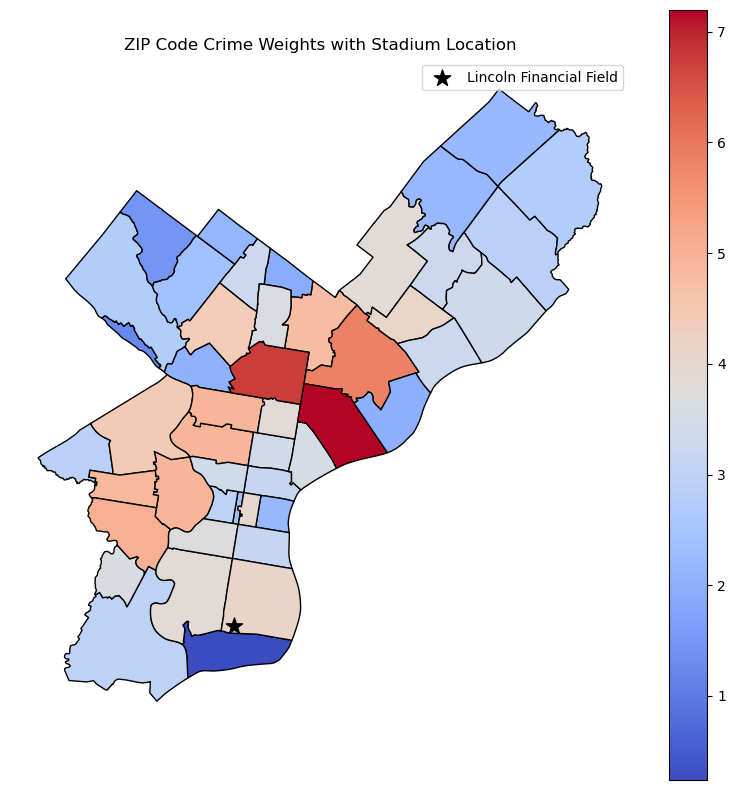

In [43]:
# If weights are not already a DataFrame
zip_weights_df = zip_weights.reset_index()
zip_weights_df.columns = ["CODE", "weight"]
zip_weights_df["CODE"] = zip_weights_df["CODE"].astype(str)

stadium_lat = 39.9008
stadium_lng = -75.1675

from shapely.geometry import Point
import geopandas as gpd

# Create a GeoDataFrame for the stadium
stadium_point = gpd.GeoDataFrame(
    {"name": ["Lincoln Financial Field"]},
    geometry=[Point(stadium_lng, stadium_lat)],
    crs="EPSG:4326"
)


# Merge with geometry
zip_map = zip_shapes.merge(zip_weights_df, on="CODE", how="left")


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the ZIP code heatmap
zip_map.plot(column="weight", cmap="coolwarm", legend=True, edgecolor="black", ax=ax)

# Plot the stadium point
stadium_point.plot(ax=ax, color="black", marker="*", markersize=150, label="Lincoln Financial Field")

# Customize the map
ax.set_title("ZIP Code Crime Weights with Stadium Location")
ax.axis("off")
ax.legend()

plt.show()


In [44]:
eagles_games_all["DayOfWeek"] = pd.to_datetime(eagles_games_all["Date"]).dt.day_name()
sunday_games_all = eagles_games_all[eagles_games_all["DayOfWeek"] == "Sunday"].copy()
sunday_game_days_all = set(
    pd.to_datetime(
        sunday_games_all[sunday_games_all["Location"] == "Home"]["Date"]
    ).dt.date
)



# Convert crime date to datetime.date
philly_crime_all["date"] = pd.to_datetime(philly_crime_all["dispatch_date_time"]).dt.date

# Ensure datetime column is in correct format
philly_crime_all["dispatch_date_time"] = pd.to_datetime(philly_crime_all["dispatch_date_time"])

# Add day of the week
philly_crime_all["day_of_week"] = philly_crime_all["dispatch_date_time"].dt.day_name()


# Create flag: is the crime on a Sunday home game
philly_crime_all["is_home_game_sunday"] = philly_crime_all["date"].isin(sunday_game_days_all)

# Define relevant crime types
relevant_crimes = [
    "Aggravated Assault Firearm",
    "Aggravated Assault No Firearm",
    "Robbery Firearm",
    "DRIVING UNDER THE INFLUENCE",
    "Other Assaults",
    "Robbery No Firearm",
    "Liquor Law Violations",
    "Motor Vehicle Theft",
    "Disorderly Conduct",
    "Public Drunkenness",
    "Thefts"
]

# Filter to only relevant crimes
philly_crime_filter = philly_crime_all[
    philly_crime_all["text_general_code"].isin(relevant_crimes)
].copy()


sunday_crime_data = philly_crime_filter[philly_crime_filter["day_of_week"] == "Sunday"].copy()

zip_sunday_counts = (
    sunday_crime_data.groupby(["CODE", "is_home_game_sunday"])
    .size()
    .reset_index(name="total_crimes")
)

num_game_sundays = sunday_crime_data[sunday_crime_data["is_home_game_sunday"]]["date"].nunique()
num_non_game_sundays = sunday_crime_data[~sunday_crime_data["is_home_game_sunday"]]["date"].nunique()

zip_sunday_counts["avg_crimes_per_day"] = zip_sunday_counts.apply(
    lambda row: row["total_crimes"] / num_game_sundays
    if row["is_home_game_sunday"]
    else row["total_crimes"] / num_non_game_sundays,
    axis=1
)

zip_crime_pivot = zip_sunday_counts.pivot(
    index="CODE", columns="is_home_game_sunday", values="avg_crimes_per_day"
).reset_index()
zip_crime_pivot.columns = ["CODE", "avg_non_game_sunday", "avg_game_sunday"]

zip_crime_pivot["percent_change"] = (
    (zip_crime_pivot["avg_game_sunday"] - zip_crime_pivot["avg_non_game_sunday"])
    / zip_crime_pivot["avg_non_game_sunday"]
) * 100


In [45]:
num_game_sundays

30

In [46]:
num_non_game_sundays

200

In [47]:
print(zip_crime_pivot[["CODE", "percent_change"]].sort_values(by="percent_change", ascending=False))

     CODE  percent_change
20  19127       56.028369
47  19154       38.562092
41  19148       27.485380
9   19115       25.435540
6   19111       21.988411
4   19107       17.177097
1   19103       14.002478
38  19145       13.542658
29  19136       12.479475
42  19149        9.399076
32  19139        8.487556
30  19137        7.660455
34  19141        6.188467
18  19125        4.858105
28  19135        4.292018
31  19138        4.025328
15  19122        2.065614
14  19121        1.965867
23  19130        1.221640
40  19147        0.432900
45  19152        0.386100
37  19144       -0.900901
27  19134       -1.064701
39  19146       -1.094753
13  19120       -1.662050
24  19131       -1.790034
46  19153       -1.930099
33  19140       -2.143523
12  19119       -2.313625
26  19133       -2.621723
36  19143       -3.810119
2   19104       -4.692791
16  19123       -6.220984
19  19126       -7.465825
3   19106       -8.531223
17  19124       -9.788002
35  19142      -12.353347
8   19114   

In [48]:
print(zip_crime_pivot[["CODE", "avg_game_sunday", "avg_non_game_sunday"]])


     CODE  avg_game_sunday  avg_non_game_sunday
0   19102         1.666667                2.055
1   19103         4.600000                4.035
2   19104         6.566667                6.890
3   19106         1.733333                1.895
4   19107         8.800000                7.510
5   19109         0.066667                0.110
6   19111         6.666667                5.465
7   19112              NaN                0.030
8   19114         2.866667                3.310
9   19115         1.800000                1.435
10  19116         1.100000                1.475
11  19118         0.400000                0.715
12  19119         1.900000                1.945
13  19120         7.100000                7.220
14  19121         7.866667                7.715
15  19122         4.200000                4.115
16  19123         3.366667                3.590
17  19124        10.000000               11.085
18  19125         3.633333                3.465
19  19126         1.466667              

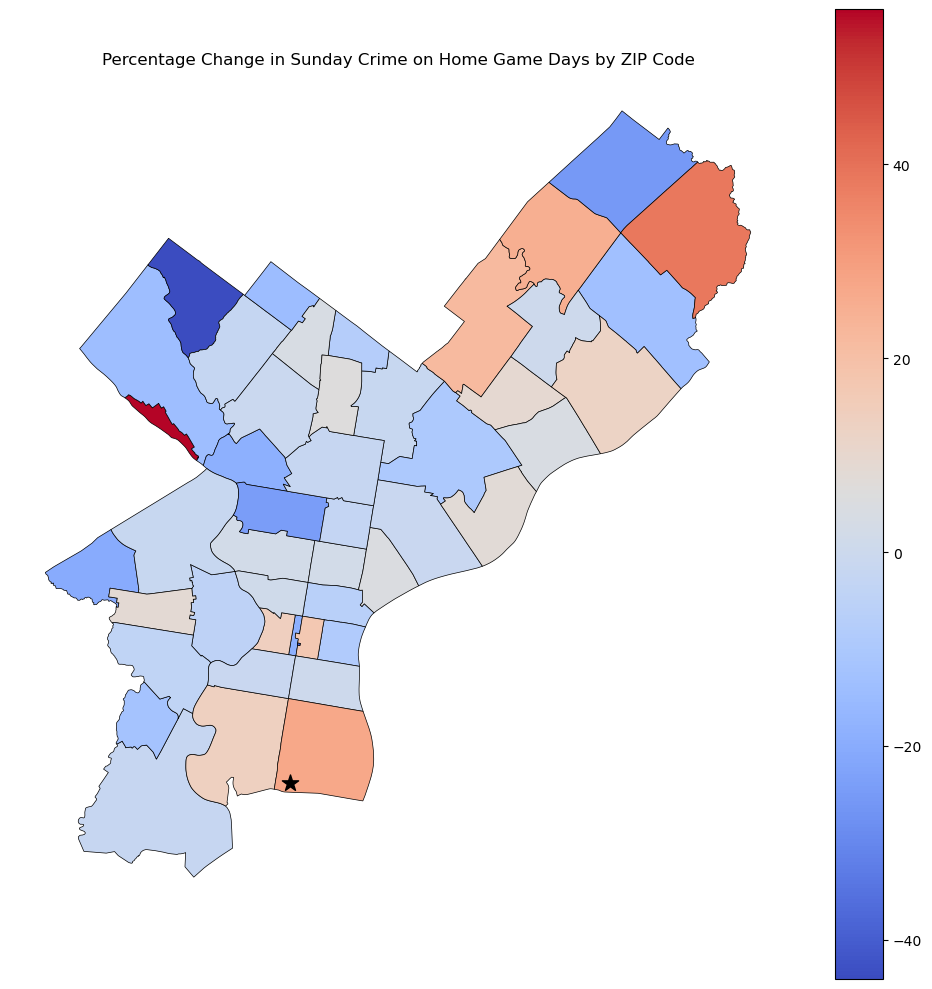

In [49]:
zip_map_data = zip_shapes.merge(zip_crime_pivot, left_on="CODE", right_on="CODE", how="left")
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
zip_map_data.plot(
    column="percent_change",
    cmap="coolwarm",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)
# Plot the stadium point
stadium_point.plot(ax=ax, color="black", marker="*", markersize=150, label="Lincoln Financial Field")
ax.set_title("Percentage Change in Sunday Crime on Home Game Days by ZIP Code")
ax.axis("off")
plt.tight_layout()
plt.show()


In [50]:
philly_crime_all["CODE"].value_counts()

CODE
19134    37820
19140    34038
19124    32789
19143    26408
19121    25319
19139    25281
19132    24656
19104    22384
19120    21757
19131    20801
19144    20762
19148    17987
19149    17266
19107    17139
19111    15835
19145    15653
19142    15217
19141    15160
19133    14446
19146    13537
19136    12601
19135    12426
19122    12391
19138    12282
19130    12280
19125    12079
19123    11607
19147    11389
19152    10679
19151    10506
19103    10448
19153    10183
19114     8531
19128     8423
19154     8396
19119     7042
19102     5981
19106     5801
19115     5501
19150     5447
19129     5410
19116     5357
19137     4905
19126     4834
19118     2440
19127     1981
19109      262
19112      109
Name: count, dtype: int64

The percentage change shows as expected, that the zip codes that Lincoln stadium is in or near have increased crime rates on game days. Zip code 19127 can be considered an outlier because it has so few crime reports (894) due to its small size that the change from 0.47 to 0.73 is just luck. We also only have 30 days of home games on sundays to work with so the chance of having outliers like these is increased.

Working with this same setup we will now look at if there are similar effects for 76ers games. It is unlikely that this will be the same as there are more games with each being less important, and the stadiums hold less people so there will be less people within the zip code to commit the crimes.

In [53]:
sixers_home_game_dates = []

for year in range(2021, 2025):
    season_df = nba_game_date("76ers", year)
    home_games_df = season_df[season_df["Location"] == "Home"]
    sixers_home_game_dates.extend(pd.to_datetime(home_games_df["Date"]).dt.date.tolist())

sixers_home_game_days = set(sixers_home_game_dates)



In [54]:
# Convert and flag crime data
philly_crime_all["date"] = pd.to_datetime(philly_crime_all["dispatch_date_time"]).dt.date
philly_crime_all["is_home_game_sixers"] = philly_crime_all["date"].isin(sixers_home_game_days)

# Group crime data by ZIP and game day flag (no crime type filtering)
zip_counts_sixers = (
    philly_crime_all.groupby(["CODE", "is_home_game_sixers"])
    .size()
    .reset_index(name="total_crimes")
)

# Count number of game and non-game days
num_sixers_game_days = philly_crime_all[philly_crime_all["is_home_game_sixers"]]["date"].nunique()
num_sixers_non_game_days = philly_crime_all[~philly_crime_all["is_home_game_sixers"]]["date"].nunique()

# Compute average crimes per day
zip_counts_sixers["avg_crimes_per_day"] = zip_counts_sixers.apply(
    lambda row: row["total_crimes"] / num_sixers_game_days
    if row["is_home_game_sixers"]
    else row["total_crimes"] / num_sixers_non_game_days,
    axis=1
)

# Pivot table and compute percent change
zip_crime_pivot_sixers = zip_counts_sixers.pivot(
    index="CODE", columns="is_home_game_sixers", values="avg_crimes_per_day"
).reset_index()

zip_crime_pivot_sixers.columns = ["CODE", "avg_non_game_day", "avg_game_day"]
zip_crime_pivot_sixers["percent_change"] = (
    (zip_crime_pivot_sixers["avg_game_day"] - zip_crime_pivot_sixers["avg_non_game_day"])
    / zip_crime_pivot_sixers["avg_non_game_day"]
) * 100

# Display sorted percent change
print(zip_crime_pivot_sixers[["CODE", "percent_change"]].sort_values(by="percent_change", ascending=False))


     CODE  percent_change
20  19127       11.192373
10  19116        9.242011
9   19115        9.054107
29  19136        8.265197
47  19154        7.978553
30  19137        7.338710
2   19104        5.306943
21  19128        5.114317
0   19102        5.067897
3   19106        5.031980
4   19107        4.453218
15  19122        4.038619
22  19129        3.995840
8   19114        3.718268
38  19145        3.506423
7   19112        3.309812
42  19149        2.214802
24  19131        2.089143
45  19152        1.504578
23  19130        1.504563
1   19103        1.047880
41  19148        0.462845
6   19111        0.056456
13  19120       -0.061541
18  19125       -0.388431
19  19126       -0.444341
17  19124       -0.530906
28  19135       -0.708093
14  19121       -1.468682
16  19123       -1.603961
31  19138       -2.166737
40  19147       -2.209334
27  19134       -2.261913
39  19146       -2.428224
37  19144       -2.627494
33  19140       -2.988662
35  19142       -3.733718
32  19139   

In [55]:
num_sixers_game_days

186

In [56]:
num_sixers_non_game_days

1419

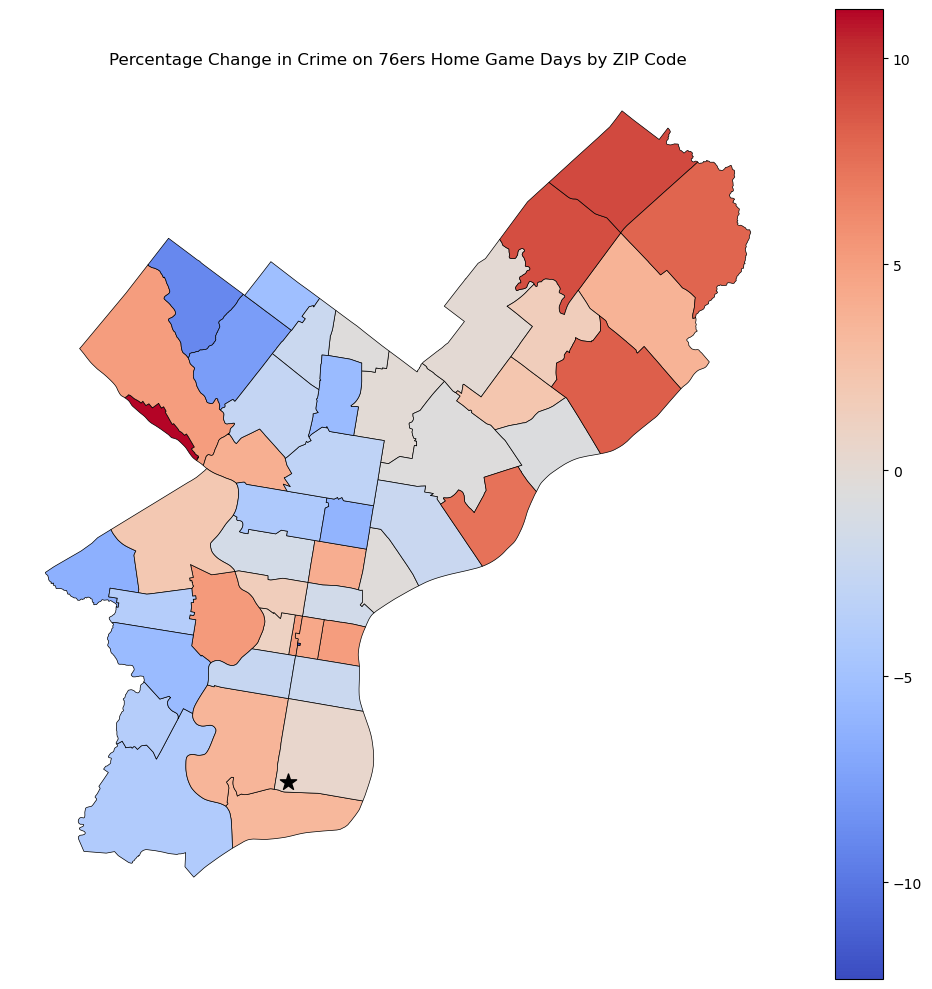

In [57]:
# Merge ZIP data with Sixers crime impact data
zip_map_data_sixers = zip_shapes.merge(zip_crime_pivot_sixers, left_on="CODE", right_on="CODE", how="left")

# Create GeoDataFrame for Wells Fargo Center
wells_fargo_point = gpd.GeoDataFrame(
    geometry=[Point(-75.1687, 39.9012)],
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
zip_map_data_sixers.plot(
    column="percent_change",
    cmap="coolwarm",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# Plot Wells Fargo Center
wells_fargo_point.plot(ax=ax, color="black", marker="*", markersize=150, label="Wells Fargo Center")

# Final touches
ax.set_title("Percentage Change in Crime on 76ers Home Game Days by ZIP Code")
ax.axis("off")
plt.tight_layout()
plt.show()


In [58]:
print(zip_crime_pivot_sixers[["CODE", "avg_game_day", "avg_non_game_day"]])

     CODE  avg_game_day  avg_non_game_day
0   19102      3.892473          3.704722
1   19103      6.569892          6.501762
2   19104     14.596774         13.861170
3   19106      3.774194          3.593376
4   19107     11.096774         10.623679
5   19109      0.145161          0.165610
6   19111      9.870968          9.865398
7   19112      0.069892          0.067653
8   19114      5.489247          5.292459
9   19115      3.698925          3.391825
10  19116      3.607527          3.302326
11  19118      1.397849          1.536293
12  19119      4.086022          4.427061
13  19120     13.548387         13.556730
14  19121     15.569892         15.801973
15  19122      7.994624          7.684285
16  19123      7.129032          7.245243
17  19124     20.333333         20.441860
18  19125      7.500000          7.529246
19  19126      3.000000          3.013390
20  19127      1.354839          1.218464
21  19128      5.483871          5.217054
22  19129      3.489247          3

In [59]:
# Convert home game dates to datetime (if not already)
home_game_dates = pd.to_datetime(list(sixers_home_game_days))

# Get day of week and count occurrences
day_counts = pd.Series(home_game_dates).dt.day_name().value_counts()

print(day_counts)


Friday       38
Wednesday    35
Monday       33
Saturday     23
Tuesday      20
Thursday     19
Sunday       18
Name: count, dtype: int64


Since games are very spread out on week days we can compare to daily averages instead of filtering to sunday like the eagles, this gives us a bigger dataset. The zip code that has the biggest increase is 19109 which once again is just a very small zip code so doesnt have many reports, the change is from an average of 0.099 to 0.129 which can be so easily thrown off by one or 2 reports.

In [61]:
print(f"Number of Sixers home game days: {num_sixers_game_days}")
print(f"Number of non-game days: {num_sixers_non_game_days}")


Number of Sixers home game days: 186
Number of non-game days: 1419


In [62]:
total_game_day_crimes = philly_crime_all[philly_crime_all["is_home_game_sixers"]].shape[0]
total_non_game_day_crimes = philly_crime_all[~philly_crime_all["is_home_game_sixers"]].shape[0]

print(f"Total crimes on Sixers home game days: {total_game_day_crimes}")
print(f"Total crimes on non-game days: {total_non_game_day_crimes}")


Total crimes on Sixers home game days: 75621
Total crimes on non-game days: 579860


In [63]:
avg_game_day_crimes = total_game_day_crimes / num_sixers_game_days
avg_non_game_day_crimes = total_non_game_day_crimes / num_sixers_non_game_days

print(f"Average crimes per game day (overall): {avg_game_day_crimes:.2f}")
print(f"Average crimes per non-game day (overall): {avg_non_game_day_crimes:.2f}")


Average crimes per game day (overall): 406.56
Average crimes per non-game day (overall): 408.64


In [64]:
chicago_crime=pd.read_csv("data/chicago_crime_data.csv")

In [65]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13851043,JJ273548,05/24/2025 12:00:00 AM,003XX N ASHLAND AVE,0620,BURGLARY,UNLAWFUL ENTRY,FACTORY / MANUFACTURING BUILDING,False,False,...,27.0,28.0,05,1165679.0,1902193.0,2025,05/31/2025 03:43:34 PM,41.887208,-87.667032,"(41.887208258, -87.667032452)"
1,13848585,JJ270563,05/24/2025 12:00:00 AM,016XX W IRVING PARK RD,0620,BURGLARY,UNLAWFUL ENTRY,OTHER (SPECIFY),False,False,...,47.0,6.0,05,1164434.0,1926620.0,2025,05/31/2025 03:43:34 PM,41.954264,-87.670912,"(41.954263915, -87.670911524)"
2,13846875,JJ267802,05/24/2025 12:00:00 AM,081XX S THROOP ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,17.0,71.0,08B,1169073.0,1850874.0,2025,05/31/2025 03:43:34 PM,41.746311,-87.656054,"(41.746310609, -87.65605416)"
3,13845573,JJ267002,05/24/2025 12:00:00 AM,0000X E 44TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,3.0,38.0,14,1177289.0,1875862.0,2025,05/31/2025 03:43:34 PM,41.814699,-87.625195,"(41.814698873, -87.625194981)"
4,13848461,JJ270404,05/24/2025 12:00:00 AM,050XX S SEELEY AVE,0890,THEFT,FROM BUILDING,OTHER (SPECIFY),False,False,...,15.0,61.0,06,1163541.0,1871291.0,2025,05/31/2025 03:43:34 PM,41.802455,-87.675753,"(41.802455323, -87.675752688)"


In [66]:
# Load Chicago crime data
chicago_crime["Latitude"] = pd.to_numeric(chicago_crime["Latitude"], errors='coerce')
chicago_crime["Longitude"] = pd.to_numeric(chicago_crime["Longitude"], errors='coerce')

# Drop rows with missing coordinates
chicago_crime = chicago_crime.dropna(subset=["Latitude", "Longitude"])

# Convert to GeoDataFrame
crime_gdf = gpd.GeoDataFrame(
    chicago_crime,
    geometry=gpd.points_from_xy(chicago_crime["Longitude"], chicago_crime["Latitude"]),
    crs="EPSG:4326"
)

# Load ZIP code shapefile
zip_shapes = gpd.read_file("data/Boundaries - ZIP Codes_20250601/geo_export_d8622bad-255e-4041-b5c2-003ea4be6c96.shp") 

# Spatial join: assign ZIP codes
zip_shapes = zip_shapes.rename(columns={"zip": "zip_code"})

# Assign ZIP code to each crime
crime_gdf = gpd.sjoin(
    crime_gdf,
    zip_shapes[["geometry", "zip_code"]],
    how="left",
    predicate="within"
)


/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/51784077.py:22: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  crime_gdf = gpd.sjoin(


In [67]:
def load_all_bears_games():
    all_games = []
    for year in [2021, 2022, 2023, 2024]:
        games = nfl_game_date(year, "Bears").copy()
        games["date"] = pd.to_datetime(games["Date"]).dt.date
        games["year"] = year
        all_games.append(games)
    return pd.concat(all_games, ignore_index=True)

bears_games_all = load_all_bears_games()
#filter to home games to measure crimes
bears_games = bears_games_all[bears_games_all["Location"] == "Home"]

In [68]:
bears_games["Date"] = pd.to_datetime(bears_games["Date"])
bears_home_days = set(bears_games[bears_games["Location"] == "Home"]["Date"].dt.date)

# Extract date from crime timestamp
crime_gdf["date"] = pd.to_datetime(crime_gdf["Date"]).dt.date

# Flag home game days
crime_gdf["is_home_game"] = crime_gdf["date"].isin(bears_home_days)


/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/3281999444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bears_games["Date"] = pd.to_datetime(bears_games["Date"])
/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/3281999444.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_gdf["date"] = pd.to_datetime(crime_gdf["Date"]).dt.date


In [69]:
# Group crime data by ZIP and home game flag
zip_counts = (
    crime_gdf.groupby(["zip_code", "is_home_game"])
    .size()
    .reset_index(name="total_crimes")
)

# Count game vs non-game days
num_game_days = crime_gdf[crime_gdf["is_home_game"]]["date"].nunique()
num_non_game_days = crime_gdf[~crime_gdf["is_home_game"]]["date"].nunique()

# Average crimes per day
zip_counts["avg_crimes_per_day"] = zip_counts.apply(
    lambda row: row["total_crimes"] / num_game_days
    if row["is_home_game"]
    else row["total_crimes"] / num_non_game_days,
    axis=1
)

# Pivot and calculate % change
zip_crime_pivot_bears = zip_counts.pivot(
    index="zip_code", columns="is_home_game", values="avg_crimes_per_day"
).reset_index()

zip_crime_pivot_bears.columns = ["zip_code", "avg_non_game_day", "avg_game_day"]
zip_crime_pivot_bears["percent_change"] = (
    (zip_crime_pivot_bears["avg_game_day"] - zip_crime_pivot_bears["avg_non_game_day"])
    / zip_crime_pivot_bears["avg_non_game_day"]
) * 100

print(zip_crime_pivot_bears.sort_values("percent_change", ascending=False))


   zip_code  avg_non_game_day  avg_game_day  percent_change
49    60654          6.960622     10.219512       46.818956
52    60657         10.712435     13.243902       23.631109
4     60605          7.976166      9.780488       22.621420
0     60601          4.501554      5.390244       19.741836
57    60707          2.493264      2.975610       19.345944
9     60610          8.010881      9.487805       18.436475
36    60639         14.682902     17.219512       17.275949
10    60611         10.504145     12.243902       16.562579
15    60616         12.645596     14.536585       14.953740
50    60655          2.221244      2.536585       14.196635
21    60622         11.325389     12.878049       13.709553
6     60607         10.732642     12.195122       13.626462
44    60647         13.744560     15.512195       12.860620
24    60625          9.789119     11.024390       12.618817
14    60615         11.949223     13.317073       11.447191
7     60608         14.405699     15.902

In [70]:
# --- Total crime change across the city ---

# Total crimes on game days
total_game_day_crimes = crime_gdf[crime_gdf["is_home_game"]].shape[0]

# Total crimes on non-game days
total_non_game_day_crimes = crime_gdf[~crime_gdf["is_home_game"]].shape[0]

# Number of days of each type
num_game_days = crime_gdf[crime_gdf["is_home_game"]]["date"].nunique()
num_non_game_days = crime_gdf[~crime_gdf["is_home_game"]]["date"].nunique()

# Compute average crimes per day
avg_game_day_crimes = total_game_day_crimes / num_game_days
avg_non_game_day_crimes = total_non_game_day_crimes / num_non_game_days

# Compute percent change
percent_change_total = ((avg_game_day_crimes - avg_non_game_day_crimes) / avg_non_game_day_crimes) * 100

# Display
print(f"Average crimes per game day: {avg_game_day_crimes:.2f}")
print(f"Average crimes per non-game day: {avg_non_game_day_crimes:.2f}")
print(f"Percent change in average crimes on game days: {percent_change_total:.2f}%")


Average crimes per game day: 665.12
Average crimes per non-game day: 634.53
Percent change in average crimes on game days: 4.82%


In [71]:
num_game_days

41

In [72]:
num_non_game_days

1930

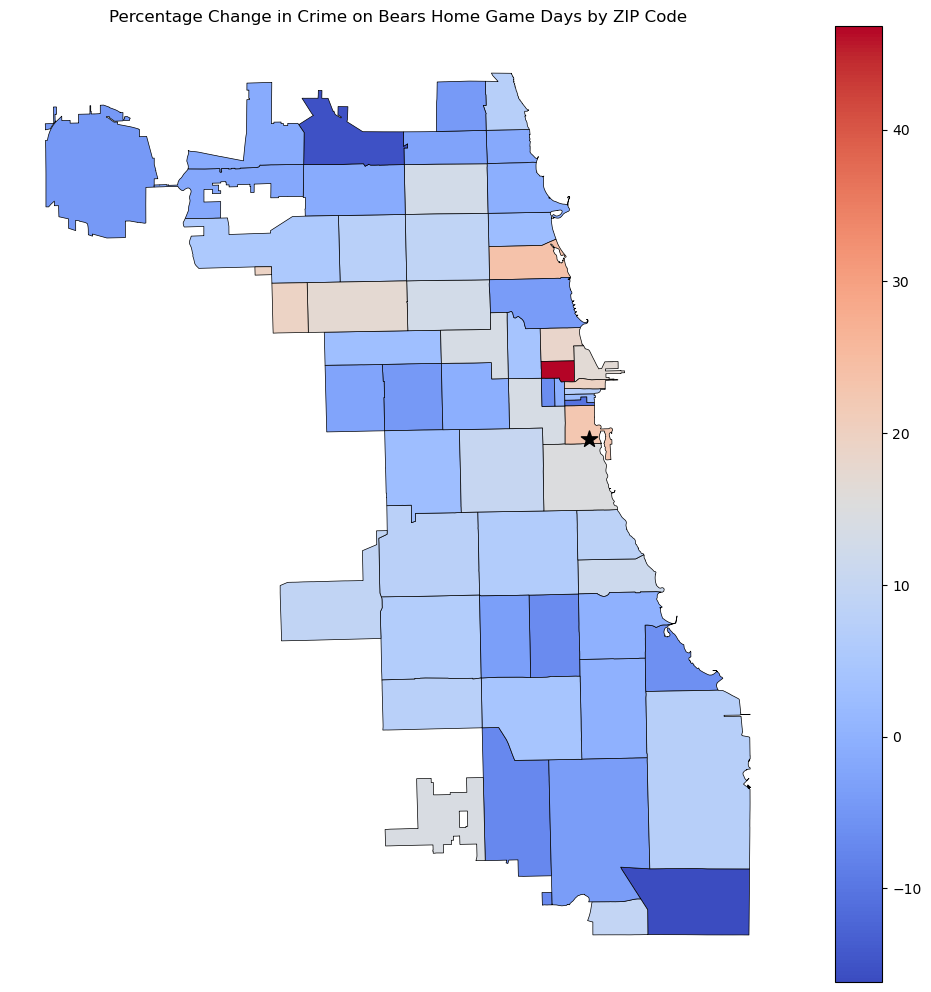

In [73]:
# Merge ZIP shapefile with crime change data
zip_map_data_bears = zip_shapes.merge(zip_crime_pivot_bears, on="zip_code", how="left")

# Create GeoDataFrame for Soldier Field location
soldier_field_point = gpd.GeoDataFrame(
    geometry=[Point(-87.6195, 41.8625)],  # Longitude, Latitude
    crs="EPSG:4326"
)

# Plot the ZIP crime change map
fig, ax = plt.subplots(figsize=(10, 10))
zip_map_data_bears.plot(
    column="percent_change",
    cmap="coolwarm",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# Plot the stadium location
soldier_field_point.plot(ax=ax, color="black", marker="*", markersize=150, label="Soldier Field")

# Final plot details
ax.set_title("Percentage Change in Crime on Bears Home Game Days by ZIP Code")
ax.axis("off")
plt.tight_layout()
plt.show()


In [74]:
# --- Step 1: Get ZIP code centroids & distance to stadium ---
zip_centroids = zip_shapes.copy()
zip_centroids["centroid"] = zip_centroids.geometry.centroid
zip_centroids = zip_centroids.set_geometry("centroid")
zip_centroids = zip_centroids.to_crs(epsg=4326)

# Calculate distance to Soldier Field (in km)
stadium_point = soldier_field_point.to_crs(epsg=4326).geometry.iloc[0]
zip_centroids["distance_km"] = zip_centroids.geometry.distance(stadium_point) * 111  # approx. deg to km

# --- Step 2: Group crime by ZIP and date ---
crime_gdf["date"] = pd.to_datetime(crime_gdf["Date"]).dt.date
daily_zip_crime = crime_gdf.groupby(["zip_code", "date"]).size().reset_index(name="crime_count")

# Add game day flag
home_game_days = set(home_game_days)  # ensure it's a set
daily_zip_crime["is_home_game"] = daily_zip_crime["date"].isin(home_game_days).astype(int)

# Merge in ZIP-level distance
daily_zip_crime = daily_zip_crime.merge(
    zip_centroids[["zip_code", "distance_km"]],
    left_on="zip_code",
    right_on="zip_code",
    how="left"
)

# Drop missing distances
daily_zip_crime = daily_zip_crime.dropna(subset=["distance_km"])

# --- Step 3: Run regression ---
X = daily_zip_crime[["is_home_game", "distance_km"]]
y = daily_zip_crime["crime_count"]

model = LinearRegression()
model.fit(X, y)

# --- Step 4: Show coefficients ---
coef_df = pd.DataFrame({
    "Variable": ["Intercept", "is_home_game", "distance_km"],
    "Coefficient": [model.intercept_] + list(model.coef_)
})

print(coef_df)



/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/2549331628.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_centroids["centroid"] = zip_centroids.geometry.centroid
/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/2549331628.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_centroids["distance_km"] = zip_centroids.geometry.distance(stadium_point) * 111  # approx. deg to km
/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/2549331628.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_gdf["date"] = pd.to_da

       Variable  Coefficient
0     Intercept    12.262106
1  is_home_game     0.366010
2   distance_km    -0.093904


This shows a few things. The intercept of 12 shows that at 0 km from the stadium the average daily crime count is 12. The home game coefficeint shows that crime increases 0.366 crimes per day per zip code on a home game day. The distance coefficient shows that for every km away from the stadium crime decreases by 0.09 per day. 

Now going to look at percentage changes of specific crimes in windows around game times.

In [77]:
def load_all_bears_games_time():
    all_games = []
    for year in [2021, 2022, 2023, 2024]:
        games = nfl_game_date(year, "Bears").copy()

        # Ensure Date is datetime with time
        games["datetime"] = pd.to_datetime(games["Date"])

        # Extract date only and add year
        games["date"] = games["datetime"].dt.date
        games["year"] = year

        all_games.append(games)

    return pd.concat(all_games, ignore_index=True)

# Load all games
bears_games_all = load_all_bears_games_time()

# Filter to home games
bears_home_games = bears_games_all[bears_games_all["Location"] == "Home"]

bears_game_datetimes = bears_home_games["datetime"].tolist()


In [78]:
from datetime import timedelta
import numpy as np

# Set desired ZIP code
TARGET_ZIP = "60605"  # ZIP code around Soldier Field

# Optional: Filter to crimes from 2024+ in selected ZIP
crime_sample = crime_gdf
[
    (crime_gdf["zip_code"] == TARGET_ZIP)
].copy()

# Parse datetime and extract components
crime_sample["datetime"] = pd.to_datetime(crime_sample["Date"])
crime_sample["date"] = crime_sample["datetime"].dt.date
crime_sample["time"] = crime_sample["datetime"].dt.time

# ✅ Filter Bears games to only home games — just to be sure
bears_home_games = bears_games_all[bears_games_all["Location"] == "Home"]
bears_game_datetimes = bears_home_games["datetime"].tolist()

# Define time window around home game (±20 hrs)
def tag_game_window(crime_time, game_times, window=timedelta(hours=20)):
    for game_time in game_times:
        if game_time - window <= crime_time < game_time:
            return "before_game"
        elif game_time <= crime_time < game_time + window:
            return "after_game"
    return None

# Tag crimes occurring in window
crime_sample["game_window"] = crime_sample["datetime"].apply(
    lambda x: tag_game_window(x, bears_game_datetimes)
)

# Filter to crimes near game times
windowed_crimes = crime_sample[crime_sample["game_window"].notna()]

# Group by crime type and timing
crime_type_counts = (
    windowed_crimes.groupby(["Primary Type", "game_window"])
    .size()
    .unstack()
    .fillna(0)
)

# Add total crimes across before and after windows
crime_type_counts["total_crimes"] = (
    crime_type_counts["before_game"] + crime_type_counts["after_game"]
)

# Percent change before → after game
crime_type_counts["percent_change"] = (
    (crime_type_counts["after_game"] - crime_type_counts["before_game"])
    / crime_type_counts["before_game"].replace(0, np.nan)
) * 100

# Display
crime_type_counts = crime_type_counts.sort_values("percent_change", ascending=False)
display(crime_type_counts[["before_game", "after_game", "percent_change"]])


/var/folders/xt/d01l_q856c9g34hfhlqrwxch0000gn/T/ipykernel_34395/3070788501.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_sample["datetime"] = pd.to_datetime(crime_sample["Date"])


game_window,before_game,after_game,percent_change
Primary Type,,,
OBSCENITY,1.0,5.0,400.000000
KIDNAPPING,10.0,15.0,50.000000
CONCEALED CARRY LICENSE VIOLATION,10.0,15.0,50.000000
HOMICIDE,54.0,77.0,42.592593
CRIMINAL SEXUAL ASSAULT,120.0,160.0,33.333333
INTERFERENCE WITH PUBLIC OFFICER,30.0,36.0,20.000000
STALKING,39.0,45.0,15.384615
OFFENSE INVOLVING CHILDREN,124.0,136.0,9.677419
SEX OFFENSE,90.0,98.0,8.888889


In [79]:
# Group by crime type and timing
crime_type_counts = (
    windowed_crimes.groupby(["Primary Type", "game_window"])
    .size()
    .unstack()
    .fillna(0)
)

# Add total crimes per crime type
crime_type_counts["total_crimes"] = (
    crime_type_counts["before_game"] + crime_type_counts["after_game"]
)

# Percent change before → after game
crime_type_counts["percent_change"] = (
    (crime_type_counts["after_game"] - crime_type_counts["before_game"])
    / crime_type_counts["before_game"].replace(0, np.nan)
) * 100

# Compute total row
total_row = pd.DataFrame({
    "before_game": [crime_type_counts["before_game"].sum()],
    "after_game": [crime_type_counts["after_game"].sum()],
    "percent_change": [
        ((crime_type_counts["after_game"].sum() - crime_type_counts["before_game"].sum())
         / crime_type_counts["before_game"].sum()) * 100
    ]
}, index=["TOTAL"])

# Append total row to the DataFrame
crime_type_counts = pd.concat([crime_type_counts, total_row])

# Display
display(crime_type_counts[["before_game", "after_game", "percent_change"]].sort_values("percent_change", ascending=False))


,before_game,after_game,percent_change
OBSCENITY,1.0,5.0,400.000000
KIDNAPPING,10.0,15.0,50.000000
CONCEALED CARRY LICENSE VIOLATION,10.0,15.0,50.000000
HOMICIDE,54.0,77.0,42.592593
CRIMINAL SEXUAL ASSAULT,120.0,160.0,33.333333
INTERFERENCE WITH PUBLIC OFFICER,30.0,36.0,20.000000
STALKING,39.0,45.0,15.384615
OFFENSE INVOLVING CHILDREN,124.0,136.0,9.677419
SEX OFFENSE,90.0,98.0,8.888889
ROBBERY,900.0,976.0,8.444444


In [153]:
# Specify target ZIP code
TARGET_ZIP = "60605"

# Filter to crimes in the target ZIP code only
zip_filtered_crimes = windowed_crimes[windowed_crimes["zip_code"] == TARGET_ZIP]

# Group by crime type and timing
crime_type_counts = (
    zip_filtered_crimes.groupby(["Primary Type", "game_window"])
    .size()
    .unstack()
    .fillna(0)
)

# Add total crimes per crime type
crime_type_counts["total_crimes"] = (
    crime_type_counts["before_game"] + crime_type_counts["after_game"]
)

# Percent change before → after game
crime_type_counts["percent_change"] = (
    (crime_type_counts["after_game"] - crime_type_counts["before_game"])
    / crime_type_counts["before_game"].replace(0, np.nan)
) * 100

# Compute total row
total_row = pd.DataFrame({
    "before_game": [crime_type_counts["before_game"].sum()],
    "after_game": [crime_type_counts["after_game"].sum()],
    "percent_change": [
        ((crime_type_counts["after_game"].sum() - crime_type_counts["before_game"].sum())
         / crime_type_counts["before_game"].sum()) * 100
    ]
}, index=["TOTAL"])

# Append total row to the DataFrame
crime_type_counts = pd.concat([crime_type_counts, total_row])

# Display sorted
display(crime_type_counts[["before_game", "after_game", "percent_change"]].sort_values("percent_change", ascending=False))


,before_game,after_game,percent_change
PUBLIC PEACE VIOLATION,1.0,4.0,300.000000
CRIMINAL TRESPASS,6.0,14.0,133.333333
OTHER OFFENSE,6.0,11.0,83.333333
BATTERY,42.0,66.0,57.142857
CRIMINAL SEXUAL ASSAULT,2.0,3.0,50.000000
ROBBERY,8.0,12.0,50.000000
WEAPONS VIOLATION,4.0,5.0,25.000000
ASSAULT,18.0,22.0,22.222222
THEFT,86.0,103.0,19.767442
CRIMINAL DAMAGE,31.0,37.0,19.354839
